In [17]:
import readfargo3d as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path = './bae2017_03mth/'
path2 = './bae2017_03mthhalfzones/'
path3 = './bae2017_03mthquarterzones/'
path4 = './bae2017_03mtheighthzones/'
itime = 5
r0 = 1.0
fargo    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_half    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
fargo_halfinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
fargo_quart    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path3)
fargo_quartinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path3)
fargo_eight    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path4)
fargo_eightinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path4)

phi = fargo.phi
rad  = fargo.r

rad2d, phi2d = np.meshgrid(rad, phi) #explain meshgrid?                                                                                                                 \     $

print(itime*10)
#-------------------------normal------------------
rho_init   = fargo_init.rho
rho   = fargo.rho
vphi_init   = fargo_init.vphi
vphi   = fargo.vphi
vrad     = fargo.vr
vrad_init = fargo_init.vr
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad2d

omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad2d

dphi2d = np.abs(phi2d[1:,1:]-phi2d[:-1,:-1]) 
drad2d = np.abs(rad2d[1:,1:]-rad2d[:-1,:-1])
dvrad2d = vrad[1:,1:]-vrad[:-1,:-1]

pv_2d = ((rad2d*vphi)[1:,1:]-(rad2d*vphi)[:-1,:-1])
pv_2d /= (rad2d)[1:,1:]
pv_2d /= (drad2d)
pv_2d -= (dvrad2d/dphi2d)
pv_2d /= rho[1:,1:]
pv_original = pv_2d
#------init----
dvphi2d_init = vphi_init[1:,1:]-vphi_init[:-1,:-1]
dvrad2d_init = vrad_init[1:,1:]-vrad_init[:-1,:-1]

pv_2di = ((rad2d*vphi_init)[1:,1:]-(rad2d*vphi_init)[:-1,:-1])
pv_2di /= (rad2d)[1:,1:]
pv_2di /= (drad2d)
pv_2di -= (dvrad2d_init/dphi2d)
pv_2di /= rho_init[1:,1:]
pv_original_init = pv_2di

print('done')

50
done


Text(0.5, 1.0, 'time =50 orbits, 5600x2048 zones')

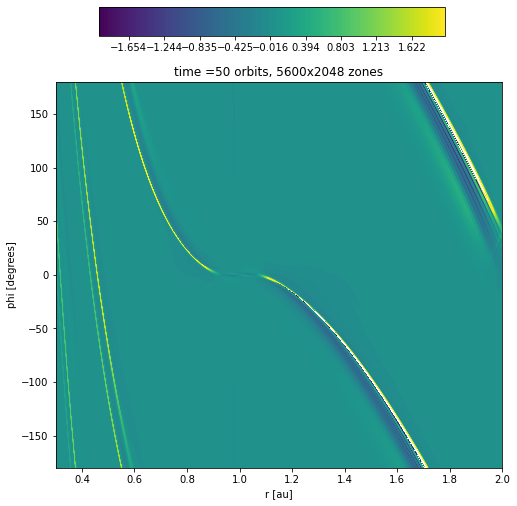

In [18]:
#PV Image
vmin = -2
vmax = 2
levels = np.linspace(vmin,vmax,128)
fig, ax = plt.subplots(figsize=(8,8))
cp = ax.contourf(fargo.r[1:], fargo.phi[1:]*180/np.pi, ((pv_2d-pv_2di)/pv_2di), levels=levels)
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
fig.colorbar(cp, cax=cax,orientation='horizontal')
fig.subplots_adjust(top=0.82, bottom=0.15)
ax.set_xlim(0.3,2)
ax.set_ylim(-180,180)
ax.set_xlabel('r [au]')
ax.set_ylabel('phi [degrees]')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 5600x2048 zones')
#plt.savefig('PV_image3mjup.png',dpi = 300)

In [14]:
#PV calculations for all other zones (3)
nf = itime
phi = np.loadtxt(path2 +'domain_x.dat')
rad  = np.loadtxt(path2 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init2   = pl.fromfile(path2 +'gasdens0.dat').reshape(ny,nx)
rho2   = pl.fromfile(path2+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init2   = pl.fromfile(path2 + 'gasvx0.dat').reshape(ny,nx)
vphi2   = pl.fromfile(path2+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad2     = pl.fromfile(path2+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init2 = pl.fromfile(path2+'gasvy0.dat').reshape(ny,nx)
omegap2 = np.loadtxt(path2+'planet0.dat')[itime][-1]
vphi2 += omegap2*rad2d
omegapinit2 = np.loadtxt(path2+'planet0.dat')[0][-1]
vphi_init2 += omegapinit2*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv2 = ((rad2d*vphi2)[1:,:]-(rad2d*vphi2)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv2 = pv2[:,:-1]
pv2 -= ((vrad2[:,1:]-vrad2[:,:-1])/dphi)[1:,:]
pv2 /= rad2d[:-1,:-1]
pv2 /= rho2[:-1,:-1]
pv_half = pv2

pv_init2 = ((rad2d*vphi_init2)[1:,:]-(rad2d*vphi_init2)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init2 = pv_init2[:,:-1]
pv_init2 -= ((vrad_init2[:,1:]-vrad_init2[:,:-1])/dphi)[1:,:]
pv_init2 /= rad2d[:-1,:-1]
pv_init2 /= rho_init2[:-1,:-1]
pv_half_init = pv_init2
#----------------
phi = np.loadtxt(path3 +'domain_x.dat')
rad  = np.loadtxt(path3 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init3   = pl.fromfile(path3 +'gasdens0.dat').reshape(ny,nx)
rho3   = pl.fromfile(path3+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init3   = pl.fromfile(path3 + 'gasvx0.dat').reshape(ny,nx)
vphi3   = pl.fromfile(path3+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad3     = pl.fromfile(path3+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init3 = pl.fromfile(path3+'gasvy0.dat').reshape(ny,nx)
omegap3 = np.loadtxt(path3+'planet0.dat')[itime][-1]
vphi3 += omegap3*rad2d
omegapinit3 = np.loadtxt(path3+'planet0.dat')[0][-1]
vphi_init3 += omegapinit3*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv3 = ((rad2d*vphi3)[1:,:]-(rad2d*vphi3)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv3 = pv3[:,:-1]
pv3 -= ((vrad3[:,1:]-vrad3[:,:-1])/dphi)[1:,:]
pv3 /= rad2d[:-1,:-1]
pv3 /= rho3[:-1,:-1]
pv_quarter = pv3

pv_init3 = ((rad2d*vphi_init3)[1:,:]-(rad2d*vphi_init3)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init3 = pv_init3[:,:-1]
pv_init3 -= ((vrad_init3[:,1:]-vrad_init3[:,:-1])/dphi)[1:,:]
pv_init3 /= rad2d[:-1,:-1]
pv_init3 /= rho_init3[:-1,:-1]
pv_quarter_init = pv_init3
#---------------
phi = np.loadtxt(path4 +'domain_x.dat')
rad  = np.loadtxt(path4 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init4   = pl.fromfile(path4 +'gasdens0.dat').reshape(ny,nx)
rho4   = pl.fromfile(path4+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init4   = pl.fromfile(path4 + 'gasvx0.dat').reshape(ny,nx)
vphi4   = pl.fromfile(path4+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad4     = pl.fromfile(path4+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init4 = pl.fromfile(path4+'gasvy0.dat').reshape(ny,nx)
omegap4 = np.loadtxt(path4+'planet0.dat')[itime][-1]
vphi4 += omegap4*rad2d
omegapinit4 = np.loadtxt(path4+'planet0.dat')[0][-1]
vphi_init4 += omegapinit4*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv4 = ((rad2d*vphi4)[1:,:]-(rad2d*vphi4)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv4 = pv4[:,:-1]
pv4 -= ((vrad4[:,1:]-vrad4[:,:-1])/dphi)[1:,:]
pv4 /= rad2d[:-1,:-1]
pv4 /= rho4[:-1,:-1]
pv_eighth = pv4

pv_init4 = ((rad2d*vphi_init4)[1:,:]-(rad2d*vphi_init4)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init4 = pv_init4[:,:-1]
pv_init4 -= ((vrad_init4[:,1:]-vrad_init4[:,:-1])/dphi)[1:,:]
pv_init4 /= rad2d[:-1,:-1]
pv_init4 /= rho_init4[:-1,:-1]
pv_eighth_init = pv_init4
print('done')

done


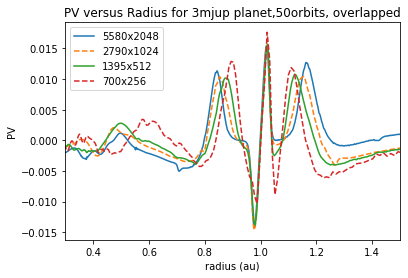

In [19]:
pv2dorig = pv_original.mean(axis=0)
pv_init2dorig = pv_original_init.mean(axis=0)
pv2dhalf = pv_half.mean(axis=1)
pv_init2dhalf = pv_half_init.mean(axis=1)
pv2dquart = pv_quarter.mean(axis=1)
pv_init2dquart = pv_quarter_init.mean(axis=1)
pv2deight = pv_eighth.mean(axis=1)
pv_init2deight = pv_eighth_init.mean(axis=1)

plt.plot(fargo.r[1:],(pv2dorig-pv_init2dorig)/pv_init2dorig, label = '5580x2048')
plt.plot(fargo_half.r[1:],(pv2dhalf-pv_init2dhalf)/pv_init2dhalf, label = '2790x1024',linestyle='dashed')
plt.plot(fargo_quart.r[1:],(pv2dquart-pv_init2dquart)/pv_init2dquart, label = '1395x512')
plt.plot(fargo_eight.r[1:],(pv2deight-pv_init2deight)/pv_init2deight, label = '700x256',linestyle='dashed')
plt.xlabel('radius (au)')
plt.ylabel('PV')
plt.xlim(0.3, 1.5)
plt.title('PV versus Radius for 3mjup planet,'+str(itime*10)+'orbits, overlapped')
plt.legend()
plt.savefig('PV3mjup_2D'+str(itime*10)+'_allzones',dpi=300)